# **Engagement Analysis**

In [ ]:
import pandas as pd
import ast
import numpy as np
from scipy import stats

# Load the data
individual_gaze = pd.read_excel('individual/Bhumika_2_1.xlsx')
individual_engagement = pd.read_excel('individual/Bhumika_2_1_xl.xlsx')
group_gaze = pd.read_excel('group/Bhumika_2_C.xlsx')
group_engagement = pd.read_excel('group/Bhumika_2_C_xl.xlsx')

# Extract values
individual_sliderRes_str = individual_engagement['slider.responsesVal'][1]
group_sliderRes_str = group_engagement['slider.responsesVal'][1]
individual_sliderRes_str_time = individual_engagement['slider.responsesT'][1]
group_sliderRes_str_time = group_engagement['slider.responsesT'][1]

# Function to convert string representation of a list to a list of floats
def convert_string_to_list(value_str):
    try:
        # Convert string to list
        value_list = ast.literal_eval(value_str)
        if isinstance(value_list, list):
            return [float(x) for x in value_list]  # Convert list elements to floats
    except (ValueError, SyntaxError):
        pass
    return []

# Convert string to list
individual_sliderRes = convert_string_to_list(individual_sliderRes_str)
group_sliderRes = convert_string_to_list(group_sliderRes_str)

# Convert lists to Series for calculation
individual_sliderRes_series = pd.Series(individual_sliderRes)
group_sliderRes_series = pd.Series(group_sliderRes)
individual_sliderRes_series_time = pd.Series(convert_string_to_list(individual_sliderRes_str_time))
group_sliderRes_series_time = pd.Series(convert_string_to_list(group_sliderRes_str_time))
# Calculate mean engagement values
engagement_individual_mean = individual_sliderRes_series.mean()
engagement_group_mean = group_sliderRes_series.mean()

# Print results
print(f"Mean engagement value for individual: {engagement_individual_mean}")
print(f"Mean engagement value for group: {engagement_group_mean}")


# Perform t-test
t_statistic, p_value = stats.ttest_ind(individual_sliderRes_series, group_sliderRes_series, equal_var=False)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")


Mean engagement value for individual: 0.5089101620029455
Mean engagement value for group: 0.33761528326745716
T-statistic: 13.513039679186315
P-value: 2.9841183136183585e-38
Reject the null hypothesis: There is a significant difference between the two groups.


In [ ]:
# Calculate average gaze coordinates for individual data
individual_gaze['avg_gaze_x'] = (individual_gaze['left_gaze_x'] + individual_gaze['right_gaze_x']) / 2
individual_gaze['avg_gaze_y'] = (individual_gaze['left_gaze_y'] + individual_gaze['right_gaze_y']) / 2

# Calculate overall average gaze coordinates
individual_gaze['avg_gaze'] = np.sqrt(individual_gaze['avg_gaze_x']**2 + individual_gaze['avg_gaze_y']**2)

# Calculate average gaze coordinates for group data
group_gaze['avg_gaze_x'] = (group_gaze['left_gaze_x'] + group_gaze['right_gaze_x']) / 2
group_gaze['avg_gaze_y'] = (group_gaze['left_gaze_y'] + group_gaze['right_gaze_y']) / 2

# Calculate overall average gaze coordinates
group_gaze['avg_gaze'] = np.sqrt(group_gaze['avg_gaze_x']**2 + group_gaze['avg_gaze_y']**2)


In [ ]:
# Correlation analysis for individual data
def synchronize_data(gaze_df, engagement_df):
    # Interpolating the engagement data to match the gaze timestamps
    engagement_interp = np.interp(gaze_df['time'], individual_sliderRes_series_time, individual_sliderRes_series)

    # Adding the interpolated engagement data to the gaze dataframe
    gaze_df['engagement_value'] = engagement_interp

    return gaze_df

def perform_pearson_correlation(gaze_df):
    # Calculate Pearson correlation between average gaze and engagement value
    correlation, p_value = pearsonr(gaze_df['avg_gaze'], gaze_df['engagement_value'])

    return correlation, p_value
synchronized_df = synchronize_data(individual_gaze, individual_engagement)


correlation, p_value = perform_pearson_correlation(synchronized_df)

# Output the results
print(f'Pearson Correlation: {correlation}')
print(f'P-value: {p_value}')


Pearson Correlation: 0.1456415869431734
P-value: 2.63114289851182e-11


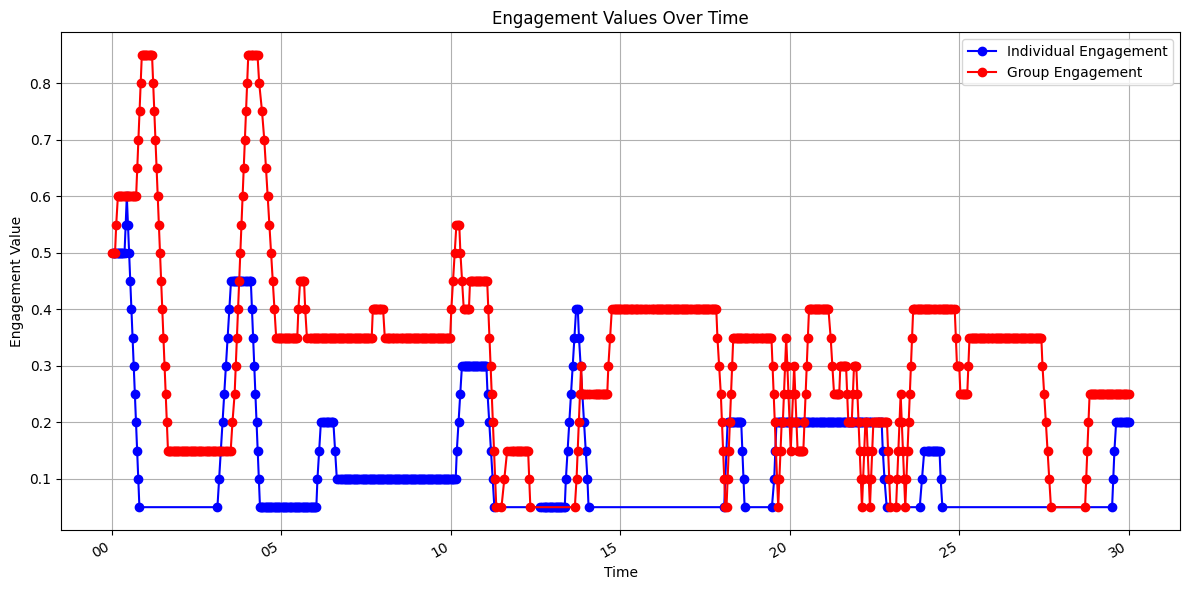

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Load the data
individual_engagement = pd.read_excel('individual/Bhumika_2_2_xl.xlsx')
group_engagement = pd.read_excel('group/Bhumika_2_C_xl.xlsx')

# Extract engagement values and timestamps
individual_engagement_values_str = individual_engagement['slider.responsesVal'][1]
individual_engagement_times_str = individual_engagement['slider.responsesT'][1]
group_engagement_values_str = group_engagement['slider.responsesVal'][1]
group_engagement_times_str = group_engagement['slider.responsesT'][1]

# Convert string representations to lists
def convert_string_to_list(value_str):
    try:
        value_list = ast.literal_eval(value_str)
        if isinstance(value_list, list):
            return [float(x) for x in value_list]
    except (ValueError, SyntaxError):
        pass
    return []

individual_engagement_values = convert_string_to_list(individual_engagement_values_str)
individual_engagement_times = convert_string_to_list(individual_engagement_times_str)
group_engagement_values = convert_string_to_list(group_engagement_values_str)
group_engagement_times = convert_string_to_list(group_engagement_times_str)

# Convert timestamps to datetime objects
# Assuming timestamps are in seconds and should start from a reference time
start_time = datetime(2024, 1, 1)  # You can set this to any reference time you prefer
individual_engagement_times = [start_time + timedelta(seconds=ts) for ts in individual_engagement_times]
group_engagement_times = [start_time + timedelta(seconds=ts) for ts in group_engagement_times]

# Create a figure and axis for plotting
plt.figure(figsize=(12, 6))

# Plot individual engagement values
plt.plot(individual_engagement_times, individual_engagement_values, label='Individual Engagement', color='blue', marker='o')

# Plot group engagement values
plt.plot(group_engagement_times, group_engagement_values, label='Group Engagement', color='red', marker='o')

# Format the plot
plt.xlabel('Time')
plt.ylabel('Engagement Value')
plt.title('Engagement Values Over Time')
plt.legend()
plt.grid(True)

# Format x-axis with date formatting
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=5))  # Set locator for seconds
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%S'))  # Format date to show seconds only

# Rotate date labels for readability
plt.gcf().autofmt_xdate()

# Show plot
plt.tight_layout()
plt.show()



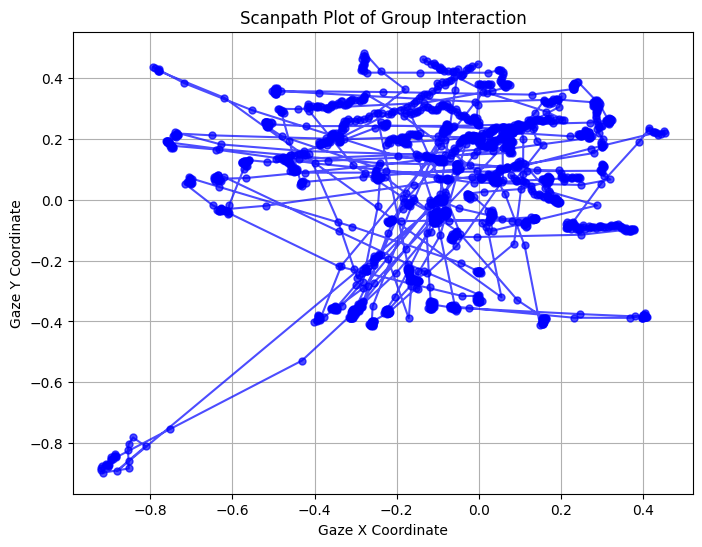

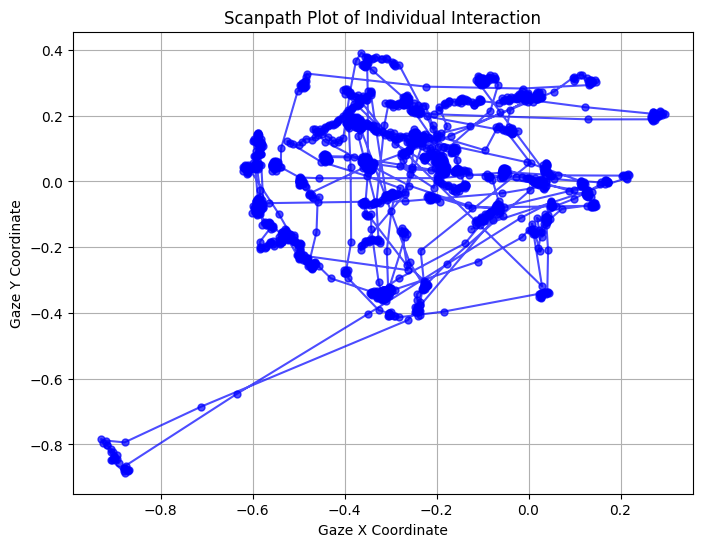

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_scanpath(gaze_data_file, gazeType):
    # Load gaze data from Excel file
    gaze_data = pd.read_excel(gaze_data_file)

    # Calculate average gaze coordinates
    gaze_data['gaze_x'] = (gaze_data['left_gaze_x'] + gaze_data['right_gaze_x']) / 2
    gaze_data['gaze_y'] = (gaze_data['left_gaze_y'] + gaze_data['right_gaze_y']) / 2

    # Extract the coordinates and timestamps
    x_coords = gaze_data['gaze_x'].values
    y_coords = gaze_data['gaze_y'].values
    timestamps = gaze_data['time'].values

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', markersize=5, alpha=0.7)

    # Optional: Annotate each point with its timestamp
    # for i, txt in enumerate(timestamps):
        # plt.annotate(f"{txt:.2f}", (x_coords[i], y_coords[i]), fontsize=8, color='red')

    # Set labels and title
    plt.xlabel('Gaze X Coordinate')
    plt.ylabel('Gaze Y Coordinate')
    plt.title(f'Scanpath Plot of {gazeType}')
    plt.grid(True)
    plt.show()

# Example usage
gaze_data_file = 'group/Bhumika_2_C.xlsx'  # Replace with your file path
plot_scanpath(gaze_data_file, 'Group Interaction')

gaze_data_file = 'individual/Bhumika_2_2.xlsx'
plot_scanpath(gaze_data_file, 'Individual Interaction')

# **Analysis of high and low engagement**

<ipython-input-1-f17b75e52109>:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-1-f17b75e52109>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_gaze['avg_gaze_x'] = (high_engagement_gaze['left_gaze_x'] + high_engagement_gaze['right_gaze_x']) / 2
<ipython-input-1-f17b75e52109>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_engagement_gaze['avg_

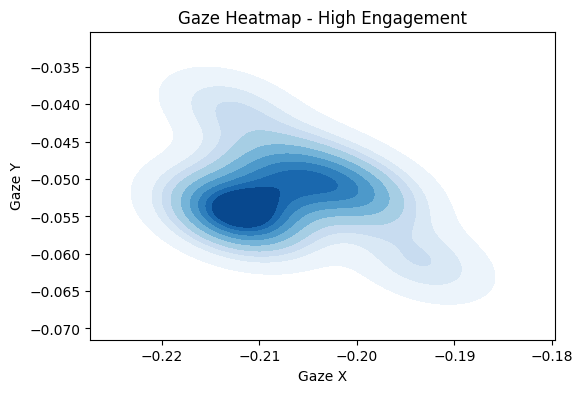

<ipython-input-1-f17b75e52109>:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-1-f17b75e52109>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_engagement_gaze['avg_gaze_x'] = (low_engagement_gaze['left_gaze_x'] + low_engagement_gaze['right_gaze_x']) / 2
<ipython-input-1-f17b75e52109>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_engagement_gaze['avg_gaze

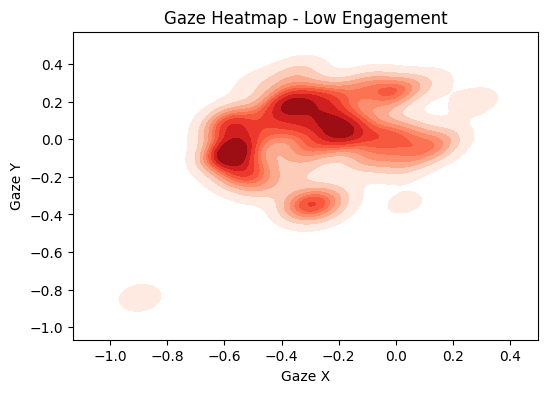

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
# Load your data
individual_gaze = pd.read_excel('individual/Bhumika_2_2.xlsx')
individual_engagement = pd.read_excel('individual/Bhumika_2_2_xl.xlsx')

def convert_string_to_list(value_str):
    try:
        value_list = ast.literal_eval(value_str)
        if isinstance(value_list, list):
            return [float(x) for x in value_list]
    except (ValueError, SyntaxError):
        pass
    return []

# Assuming the timestamps and engagement values are in the following columns
gaze_timestamps = individual_gaze['time']  # Replace 'timestamp' with the actual column name
engagement_timestamps = pd.Series(convert_string_to_list(individual_engagement['slider.responsesT'][1]))  # Replace 'timestamp' with the actual column name
engagement_values = pd.Series(convert_string_to_list(individual_engagement['slider.responsesVal'][1]))  # Replace 'engagement' with the actual column name

# Interpolate engagement values to match gaze timestamps
engagement_interpolated = np.interp(gaze_timestamps, engagement_timestamps, engagement_values)

# Add interpolated engagement values to gaze data
individual_gaze['engagement'] = engagement_interpolated

# Define high and low engagement thresholds
high_engagement_threshold = 0.5
low_engagement_threshold = 0.5

# Segment data into high and low engagement
high_engagement_gaze = individual_gaze[individual_gaze['engagement'] >= high_engagement_threshold]
low_engagement_gaze = individual_gaze[individual_gaze['engagement'] < low_engagement_threshold]

# High engagement heatmap
plt.figure(figsize=(6, 4))
sns.kdeplot(
    x=(high_engagement_gaze['left_gaze_x'] + high_engagement_gaze['right_gaze_x']) / 2,
    y=(high_engagement_gaze['left_gaze_y'] + high_engagement_gaze['right_gaze_y']) / 2,
    cmap='Blues', shade=True, thresh=0.05
)
# Calculate average gaze coordinates for individual data
high_engagement_gaze['avg_gaze_x'] = (high_engagement_gaze['left_gaze_x'] + high_engagement_gaze['right_gaze_x']) / 2
high_engagement_gaze['avg_gaze_y'] = (high_engagement_gaze['left_gaze_y'] + high_engagement_gaze['right_gaze_y']) / 2

# Calculate overall average gaze coordinates
high_engagement_gaze['avg_gaze'] = np.sqrt(high_engagement_gaze['avg_gaze_x']**2 + high_engagement_gaze['avg_gaze_y']**2)


plt.title('Gaze Heatmap - High Engagement')
plt.xlabel('Gaze X')
plt.ylabel('Gaze Y')
plt.show()

# Low engagement heatmap
plt.figure(figsize=(6, 4))
sns.kdeplot(
    x=(low_engagement_gaze['left_gaze_x'] + low_engagement_gaze['right_gaze_x']) / 2,
    y=(low_engagement_gaze['left_gaze_y'] + low_engagement_gaze['right_gaze_y']) / 2,
    cmap='Reds', shade=True, thresh=0.05
)

# Calculate average gaze coordinates for individual data
low_engagement_gaze['avg_gaze_x'] = (low_engagement_gaze['left_gaze_x'] + low_engagement_gaze['right_gaze_x']) / 2
low_engagement_gaze['avg_gaze_y'] = (low_engagement_gaze['left_gaze_y'] + low_engagement_gaze['right_gaze_y']) / 2

# Calculate overall average gaze coordinates
low_engagement_gaze['avg_gaze'] = np.sqrt(low_engagement_gaze['avg_gaze_x']**2 + low_engagement_gaze['avg_gaze_y']**2)

plt.title('Gaze Heatmap - Low Engagement')
plt.xlabel('Gaze X')
plt.ylabel('Gaze Y')
plt.show()



def convert_string_to_list(value_str):
    try:
        value_list = ast.literal_eval(value_str)
        if isinstance(value_list, list):
            return [float(x) for x in value_list]
    except (ValueError, SyntaxError):
        pass
    return []

In [ ]:
from scipy.stats import pearsonr, spearmanr
high_corr, pearson_p_value = pearsonr(high_engagement_gaze['avg_gaze'], high_engagement_gaze['engagement'])
low_corr, pearson_p_value1 = pearsonr(low_engagement_gaze['avg_gaze'], low_engagement_gaze['engagement'])
print("corr value of high engagement:", high_corr, "p-value:", pearson_p_value, "corr value of low engagement:",low_corr,"p value:", pearson_p_value1)

corr value of high engagement: 0.3083886353412108 p-value: 0.3561799305709633 corr value of low engagement: 0.07031895878297292 p value: 0.001859257348751589


<ipython-input-60-7fdc7d237118>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaze_data['gaze_x'] = (gaze_data['left_gaze_x'] + gaze_data['right_gaze_x']) / 2
<ipython-input-60-7fdc7d237118>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gaze_data['gaze_y'] = (gaze_data['left_gaze_y'] + gaze_data['right_gaze_y']) / 2


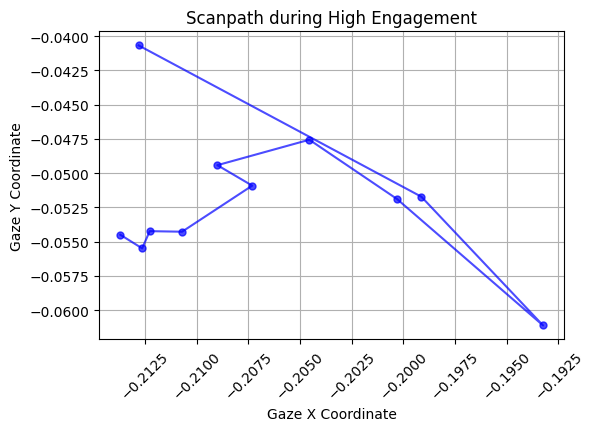

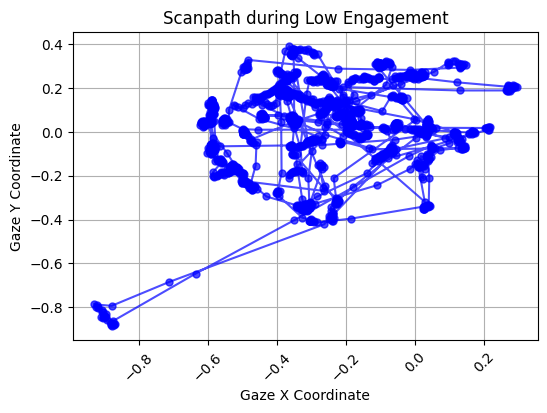

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_scanpath(gaze_data, gazeType):
    # Calculate average gaze coordinates
    gaze_data['gaze_x'] = (gaze_data['left_gaze_x'] + gaze_data['right_gaze_x']) / 2
    gaze_data['gaze_y'] = (gaze_data['left_gaze_y'] + gaze_data['right_gaze_y']) / 2

    # Extract the coordinates and timestamps
    x_coords = gaze_data['gaze_x'].values
    y_coords = gaze_data['gaze_y'].values
    timestamps = gaze_data['time'].values

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', markersize=5, alpha=0.7)

    # Optional: Annotate each point with its timestamp
    # for i, txt in enumerate(timestamps):
    #     plt.annotate(f"{txt:.2f}", (x_coords[i], y_coords[i]), fontsize=8, color='red')

    # Set labels and title
    plt.xlabel('Gaze X Coordinate')
    plt.ylabel('Gaze Y Coordinate')
    plt.title(f'Scanpath during {gazeType}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage with loaded data
# Assuming `individual_data` and `group_data` have been loaded using your previous `load_data` function.

plot_scanpath(high_engagement_gaze, 'High Engagement')
plot_scanpath(low_engagement_gaze, 'Low Engagement')

In [ ]:
# spearman Correlation
from scipy.stats import pearsonr, spearmanr
high_corr, spearmanr_p_value = spearmanr(high_engagement_gaze['avg_gaze'], high_engagement_gaze['engagement'])
low_corr, spearmanr_p_value1 = spearmanr(low_engagement_gaze['avg_gaze'], low_engagement_gaze['engagement'])
print("corr value of high engagement:", high_corr, "p-value:", spearmanr_p_value, "corr value of low engagement:", low_corr, "p value:",spearmanr_p_value1)

corr value of high engagement: 0.2935903373670295 p-value: 0.3808897595212771 corr value of low engagement: 0.036990156474351235 p value: 0.10195138648616722


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.multivariate.manova import MANOVA

# Load your data
individual_gaze = pd.read_excel('individual/Bhumika_2_2.xlsx')
individual_engagement = pd.read_excel('individual/Bhumika_2_2_xl.xlsx')

# Assuming the timestamps and engagement values are in the following columns
gaze_timestamps = individual_gaze['time']  # Replace 'timestamp' with the actual column name
engagement_timestamps = pd.Series(convert_string_to_list(individual_engagement['slider.responsesT'][1]))  # Replace 'timestamp' with the actual column name
engagement_values = pd.Series(convert_string_to_list(individual_engagement['slider.responsesVal'][1]))  # Replace 'engagement' with the actual column name

# Interpolate engagement values to match gaze timestamps
engagement_interpolated = np.interp(gaze_timestamps, engagement_timestamps, engagement_values)

# Add interpolated engagement values to gaze data
individual_gaze['engagement'] = engagement_interpolated

# Define high and low engagement thresholds
high_engagement_threshold = 0.5
low_engagement_threshold = 0.5

# Segment data into high and low engagement
high_engagement_gaze = individual_gaze[individual_gaze['engagement'] >= high_engagement_threshold]
low_engagement_gaze = individual_gaze[individual_gaze['engagement'] < low_engagement_threshold]

# Combine gaze coordinates into single columns for high and low engagement groups
high_gaze_x = (high_engagement_gaze['left_gaze_x'] + high_engagement_gaze['right_gaze_x']) / 2
high_gaze_y = (high_engagement_gaze['left_gaze_y'] + high_engagement_gaze['right_gaze_y']) / 2
low_gaze_x = (low_engagement_gaze['left_gaze_x'] + low_engagement_gaze['right_gaze_x']) / 2
low_gaze_y = (low_engagement_gaze['left_gaze_y'] + low_engagement_gaze['right_gaze_y']) / 2

# Prepare data for MANOVA
high_gaze_data = np.column_stack((high_gaze_x, high_gaze_y))
low_gaze_data = np.column_stack((low_gaze_x, low_gaze_y))

# Create a DataFrame with all gaze data
gaze_data = pd.DataFrame({
    'gaze_x': np.concatenate([high_gaze_x, low_gaze_x]),
    'gaze_y': np.concatenate([high_gaze_y, low_gaze_y]),
    'engagement_group': ['high'] * len(high_gaze_x) + ['low'] * len(low_gaze_x)
})

# Perform MANOVA
manova = MANOVA.from_formula('gaze_x + gaze_y ~ engagement_group', data=gaze_data)
manova_results = manova.mv_test()

print(manova_results)
print('No Significant difference in the combined gaze coordinates between the high and low engagement groups')


                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9957 2.0000 1964.0000  4.2455 0.0145
         Pillai's trace 0.0043 2.0000 1964.0000  4.2455 0.0145
 Hotelling-Lawley trace 0.0043 2.0000 1964.0000  4.2455 0.0145
    Roy's greatest root 0.0043 2.0000 1964.0000  4.2455 0.0145
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
    engagement_group    Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.9987 2.0000 1964.0000  1.3247 0.2661
         Pillai's trace 0.0013 2.0000 1964.0000  1.3247 0.2661
 Hotelling-

# **Individual Vs Group Interaction Analysis by taking average of all**

In [ ]:
import pandas as pd
import os

# Define paths
individual_path = 'individual'
group_path = 'group'

def load_data(folder_path):
    data = []
    for file in os.listdir(folder_path):
        if file.endswith('.xlsx'):
            df = pd.read_excel(os.path.join(folder_path, file))
            data.append(df)
    return pd.concat(data, ignore_index=True)

# Load the data
individual_data = load_data(individual_path)
group_data = load_data(group_path)

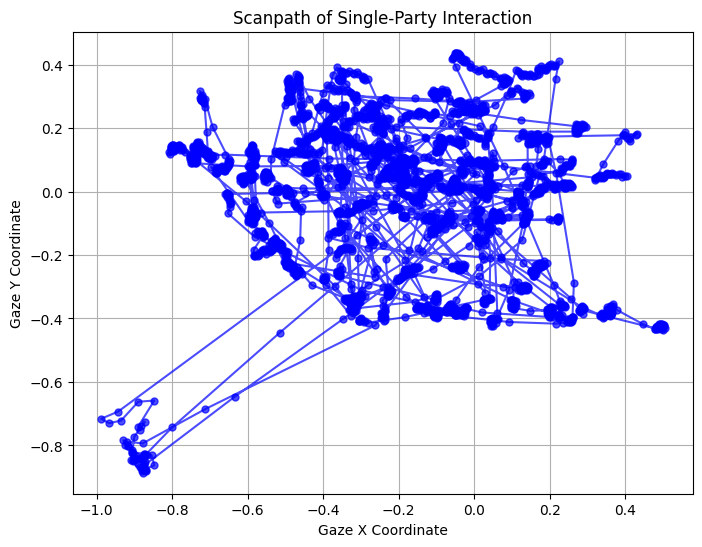

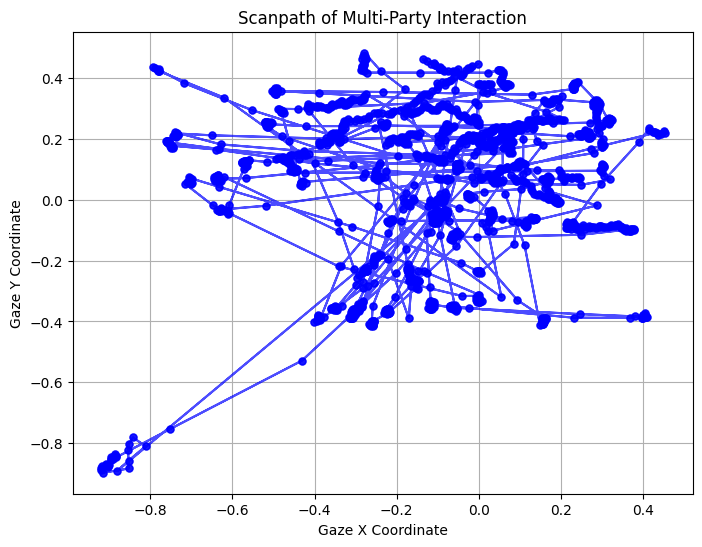

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_scanpath(gaze_data, gazeType):
    # Calculate average gaze coordinates
    gaze_data['gaze_x'] = (gaze_data['left_gaze_x'] + gaze_data['right_gaze_x']) / 2
    gaze_data['gaze_y'] = (gaze_data['left_gaze_y'] + gaze_data['right_gaze_y']) / 2

    # Extract the coordinates and timestamps
    x_coords = gaze_data['gaze_x'].values
    y_coords = gaze_data['gaze_y'].values
    timestamps = gaze_data['time'].values

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b', markersize=5, alpha=0.7)

    # Optional: Annotate each point with its timestamp
    # for i, txt in enumerate(timestamps):
    #     plt.annotate(f"{txt:.2f}", (x_coords[i], y_coords[i]), fontsize=8, color='red')

    # Set labels and title
    plt.xlabel('Gaze X Coordinate')
    plt.ylabel('Gaze Y Coordinate')
    plt.title(f'Scanpath of {gazeType}')
    plt.grid(True)
    plt.show()

# Example usage with loaded data
# Assuming `individual_data` and `group_data` have been loaded using your previous `load_data` function.

plot_scanpath(individual_data, 'Single-Party Interaction')
plot_scanpath(group_data, 'Multi-Party Interaction')


<ipython-input-70-a4df1756273e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=individual_data['gaze_x'].values, y=individual_data['gaze_y'].values, cmap='Blues', shade=True, thresh=0.05)


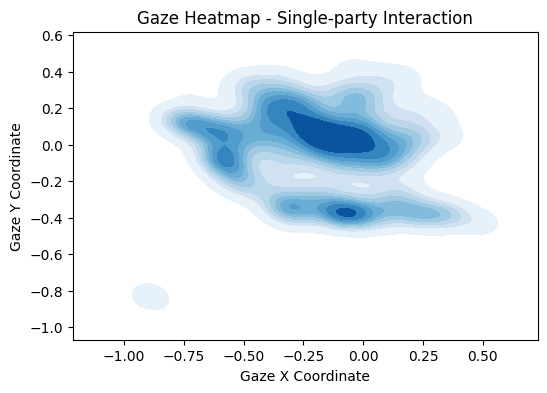

<ipython-input-70-a4df1756273e>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=group_data['gaze_x'].values, y=group_data['gaze_y'].values, cmap='Reds', shade=True, thresh=0.05)


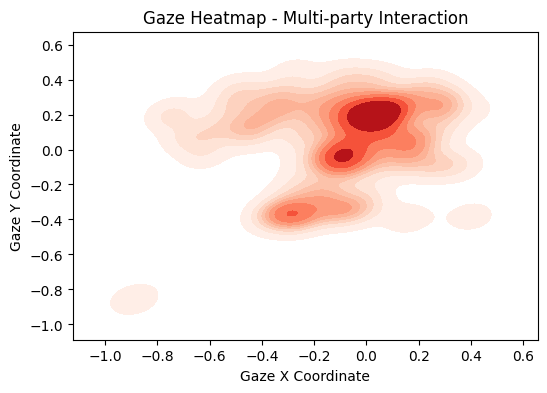

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.kdeplot(x=individual_data['gaze_x'].values, y=individual_data['gaze_y'].values, cmap='Blues', shade=True, thresh=0.05)

plt.title('Gaze Heatmap - Single-party Interaction')
plt.xlabel('Gaze X Coordinate')
plt.ylabel('Gaze Y Coordinate')
plt.show()

plt.figure(figsize=(6, 4))
sns.kdeplot(x=group_data['gaze_x'].values, y=group_data['gaze_y'].values, cmap='Reds', shade=True, thresh=0.05)
plt.title('Gaze Heatmap - Multi-party Interaction')
plt.xlabel('Gaze X Coordinate')
plt.ylabel('Gaze Y Coordinate')
plt.show()

# **Spearman Correlation**

In [ ]:
import pandas as pd

# Read engagement values from Annotator 1's file
file_annotator1 = 'Bhumika_2_1_xl.xlsx'
df_annotator1 = pd.read_excel(file_annotator1)

# Read engagement values from Annotator 2's file
file_annotator2 = 'Bamidele_2_1_xl.xlsx'
df_annotator2 = pd.read_excel(file_annotator2)




In [3]:
import ast

def convert_string_to_list(value_str):
    try:
        value_list = ast.literal_eval(value_str)
        if isinstance(value_list, list):
            return [float(x) for x in value_list]
    except (ValueError, SyntaxError):
        pass
    return []# Convert timestamps to datetime
# time1 = pd.Series(convert_string_to_list(df_annotator1['slider.responsesT'][1]))
df_annotator1['timestamp'] = pd.Series(convert_string_to_list(df_annotator1['slider.responsesT'][1]))
df_annotator2['timestamp'] = pd.Series(convert_string_to_list(df_annotator2['slider.responsesT'][1]))
df_annotator1['engagementVal'] = pd.Series(convert_string_to_list(df_annotator1['slider.responsesVal'][1]))
df_annotator2['engagementVal'] = pd.Series(convert_string_to_list(df_annotator2['slider.responsesVal'][1]))


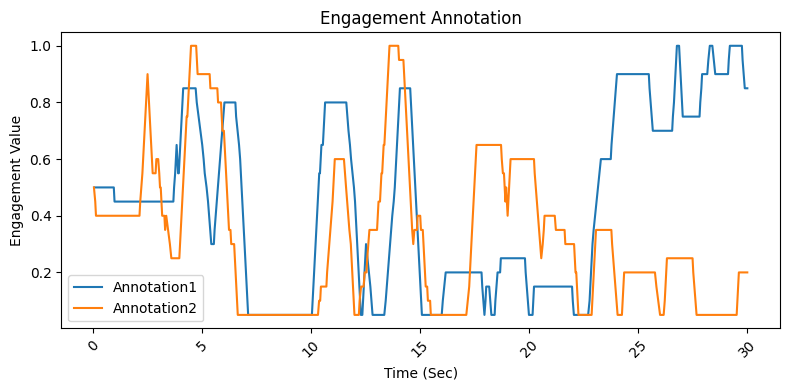

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.lineplot(x=pd.Series(convert_string_to_list(df_annotator1['slider.responsesT'][1])), y=pd.Series(convert_string_to_list(df_annotator1['slider.responsesVal'][1])),  label='Annotation1')
sns.lineplot(x=pd.Series(convert_string_to_list(df_annotator2['slider.responsesT'][1])), y=pd.Series(convert_string_to_list(df_annotator2['slider.responsesVal'][1])), label='Annotation2')

plt.title('Engagement Annotation')
plt.xlabel('Time (Sec)')
plt.ylabel('Engagement Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Smoothing Constant | Spearman Correlation | P-Value
5 | 0.2705 | 0.0000
10 | 0.2846 | 0.0000
15 | 0.2667 | 0.0000
20 | 0.2682 | 0.0000


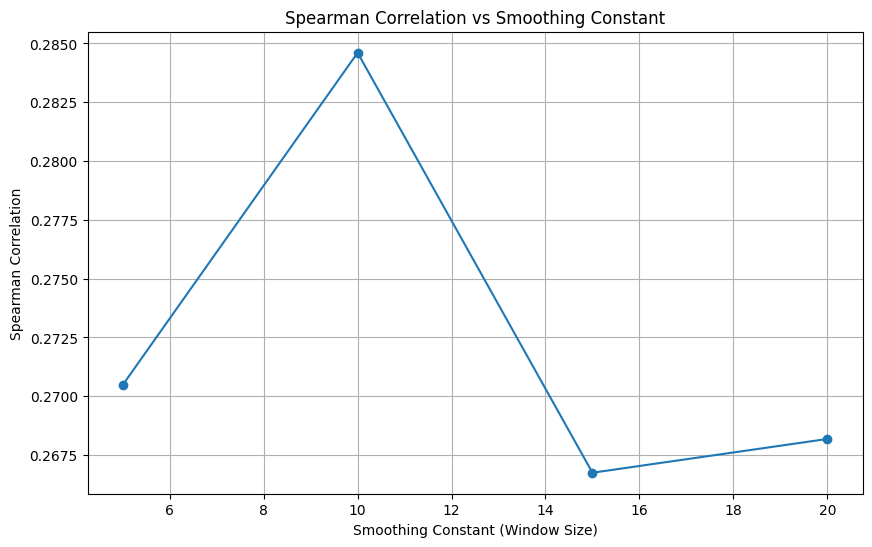

In [ ]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read engagement values from the Excel files
file_annotator1 = 'Bhumika_2_2_xl.xlsx'
file_annotator2 = 'Bamidele_2_2_xl.xlsx'

# Assuming the Excel files have 'timestamp' and 'engagement_value' columns
df_annotator1 = pd.read_excel(file_annotator1)
df_annotator2 = pd.read_excel(file_annotator2)

# Step 2: Optionally align data based on timestamps
# If timestamps are already aligned or the same, this step might be skipped
# For demonstration, we'll merge on 'timestamp'
# merged_data = pd.merge_asof(df_annotator1, df_annotator2, on='timestamp', suffixes=('_annotator1', '_annotator2'))

# Step 3: Calculate Spearman's Rank Correlation without using datetime
# Calculate Spearman's rank correlation for different smoothing constants
def smooth_data(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

def calculate_spearman(engagement1, engagement2, smoothing_constants):
    results = []
    for window_size in smoothing_constants:
        smoothed_eng1 = smooth_data(engagement1, window_size)
        smoothed_eng2 = smooth_data(engagement2, window_size)
        corr, p_value = spearmanr(smoothed_eng1, smoothed_eng2)
        results.append((window_size, corr, p_value))
    return results

# Define smoothing constants
smoothing_constants = [5, 10, 15, 20]

# Calculate Spearman correlation
spearman_results = calculate_spearman(pd.Series(convert_string_to_list(df_annotator1['slider.responsesVal'][1])), pd.Series(convert_string_to_list(df_annotator2['slider.responsesVal'][1])[:429]), smoothing_constants)

# Display the results
print("Smoothing Constant | Spearman Correlation | P-Value")
for result in spearman_results:
    print(f"{result[0]} | {result[1]:.4f} | {result[2]:.4f}")

# Plotting the correlation values for different smoothing constants
plt.figure(figsize=(10, 6))
plt.plot([result[0] for result in spearman_results], [result[1] for result in spearman_results], marker='o')
plt.title('Spearman Correlation vs Smoothing Constant')
plt.xlabel('Smoothing Constant (Window Size)')
plt.ylabel('Spearman Correlation')
plt.grid(True)
plt.show()


In [38]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# Load the CSV files into dataframes
roi_df = pd.read_csv('detection_results.csv')  # Replace 'roi.csv' with the actual file path
ground_truth_df = pd.read_csv('labelledData.csv')  # Replace 'ground_truth.csv' with the actual file path

# Merge the dataframes on the 'Image' column
merged_df = pd.merge(roi_df, ground_truth_df, on='Image')

# Rename columns for clarity
merged_df.columns = ['Image', 'ROI', 'ground truth']

# Generate the confusion matrix
cm = confusion_matrix(merged_df['ground truth'], merged_df['ROI'])

# Optionally, you can also print a classification report
report = classification_report(merged_df['ground truth'], merged_df['ROI'])

# Display the confusion matrix and classification report
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[30  0  0]
 [ 3 28  0]
 [23  0 17]]

Classification Report:
               precision    recall  f1-score   support

  Background       0.54      1.00      0.70        30
    Object 1       1.00      0.90      0.95        31
    Object 2       1.00      0.42      0.60        40

    accuracy                           0.74       101
   macro avg       0.85      0.78      0.75       101
weighted avg       0.86      0.74      0.73       101



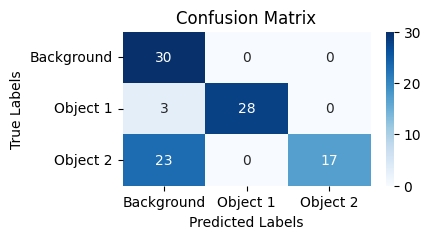

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix data
# Replace this with your actual confusion matrix
confusion_mat = cm
# Class labels for the confusion matrix
class_names = ['Background', 'Object 1', 'Object 2']

# Create the plot
plt.figure(figsize=(4, 2))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


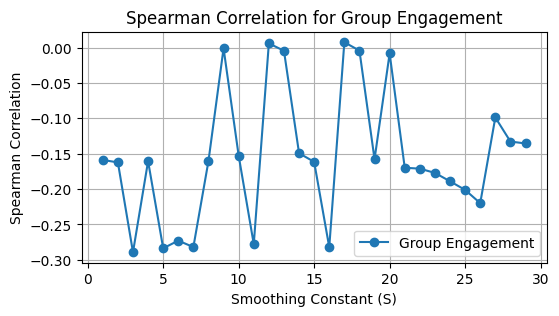

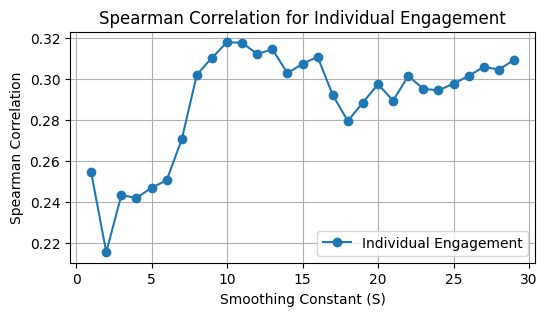

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Step 1: Read engagement values from the Excel files
file_annotator1_group = 'Bhumika_3_C_xl.xlsx'
file_annotator2_group = 'Bamidele_3_C_xl.xlsx'

file_annotator1_individual = 'Bhumika_2_2_xl.xlsx'
file_annotator2_individual = 'Bamidele_2_2_xl.xlsx'

# Assuming the Excel files have 'timestamp' and 'engagement_value' columns
df_annotator1_group = pd.read_excel(file_annotator1_group)
df_annotator2_group = pd.read_excel(file_annotator2_group)
df_annotator1_individual = pd.read_excel(file_annotator1_individual)
df_annotator2_individual = pd.read_excel(file_annotator2_individual)

# Example data
engagement_values_annotator_group = pd.Series(convert_string_to_list(df_annotator1_group['slider.responsesVal'][1]))
timestamps_annotator_group = pd.Series(convert_string_to_list(df_annotator1_group['slider.responsesT'][1]))
engagement_values_annotator2_group = pd.Series(convert_string_to_list(df_annotator2_group['slider.responsesVal'][1]))
timestamps_annotator2_group = pd.Series(convert_string_to_list(df_annotator2_group['slider.responsesT'][1]))

engagement_values_annotator_individual = pd.Series(convert_string_to_list(df_annotator1_individual['slider.responsesVal'][1]))
timestamps_annotator_individual = pd.Series(convert_string_to_list(df_annotator1_individual['slider.responsesT'][1]))
engagement_values_annotator2_individual = pd.Series(convert_string_to_list(df_annotator2_individual['slider.responsesVal'][1]))
timestamps_annotator2_individual = pd.Series(convert_string_to_list(df_annotator2_individual['slider.responsesT'][1]))

# Helper function to apply smoothing
def smooth_values(values, S):
    return uniform_filter1d(values, size=S)

# Helper function to compute Spearman correlation
def spearman_correlation(engagement_values1, engagement_values2, S):
    # Smooth the values
    smoothed_values1 = smooth_values(engagement_values1, S)
    smoothed_values2 = smooth_values(engagement_values2, S)

    # Calculate Spearman correlation
    if len(smoothed_values1) > 1:  # Ensure there are enough points for correlation
        corr, _ = spearmanr(smoothed_values1, smoothed_values2)
    else:
        corr = np.nan  # Not enough data to compute correlation

    return corr

# Define different smoothing constants S
smoothing_constants = range(1, 30)

# Lists to store correlations
group_correlations = []
individual_correlations = []

for S in smoothing_constants:
    # Group correlations
    group_corr = spearman_correlation(
        engagement_values_annotator_group,
        engagement_values_annotator2_group[:549], S
    )
    group_correlations.append(group_corr)

    # Individual correlations
    individual_corr = spearman_correlation(
        engagement_values_annotator_individual,
        engagement_values_annotator2_individual[:429], S
    )
    individual_correlations.append(individual_corr)

# Plot the results 549 429
plt.figure(figsize=(6, 3))
plt.plot(smoothing_constants, group_correlations, label='Group Engagement', marker='o')
# plt.plot(smoothing_constants, individual_correlations, label='Individual Correlation', marker='o')
plt.xlabel('Smoothing Constant (S)')
plt.ylabel('Spearman Correlation')
plt.title('Spearman Correlation for Group Engagement')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 3))
# plt.plot(smoothing_constants, group_correlations, label='Group Correlation', marker='o')
plt.plot(smoothing_constants, individual_correlations, label='Individual Engagement', marker='o')
plt.xlabel('Smoothing Constant (S)')
plt.ylabel('Spearman Correlation')
plt.title('Spearman Correlation for Individual Engagement')
plt.legend()
plt.grid(True)
plt.show()



